In [ ]:
# install libraries

! pip install pandas
! pip install obsidiantools
! pip install networkx
! pip install matplotlib
! pip install markdown
! pip install ftfy

In [229]:
import os
import pandas as pd

import obsidiantools.api as otools
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
import markdown

In [230]:
# read from obsidian:

from pathlib import Path

p = Path('./../')

vault = otools.Vault(p).connect()

G = vault.graph

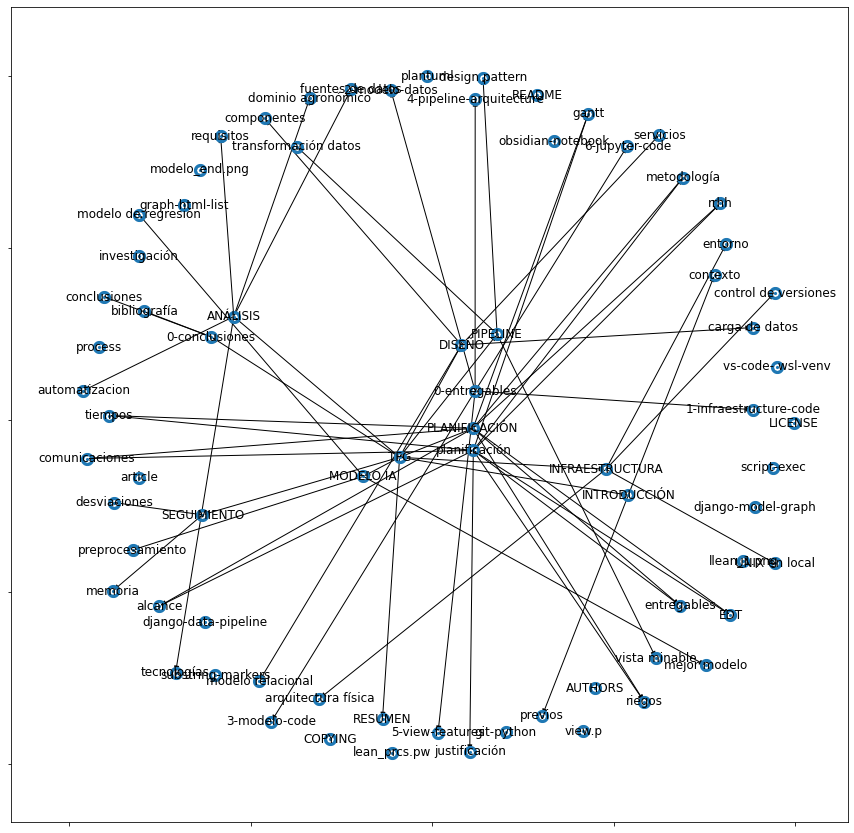

In [231]:
# create graph:

fig, ax = plt.subplots(figsize=(15,15))

nx.draw(G,  with_labels=True, 
            node_size=10, 
            alpha=1, 
            linewidths=10,
            pos=nx.spring_layout(G),
            cmap=plt.get_cmap('jet'),
            ax=ax)

limits=plt.axis('on') # turns on axis

ax.tick_params(left=True, bottom=True)

plt.draw()

In [232]:
import markdown

In [233]:

def process_note(md_file):

    

    pass

In [234]:
# transform mermaid diagrams by hand

import re

def mermaid_process1(text):

    #result = re.search('```mermaid(.*)```', text)

    result = re.findall('```mermaid(?s:.*?)```', text, re.M)

    for i in range(len(result)):

        sub_text = result[i][len('```mermaid'):-3]

        text = re.sub('```mermaid(?s:.*?)```', '<div class="mermaid">'+ sub_text + '</div>', text, 1)

    return text

In [235]:
# RECURSIVE:

import re

def mermaid_process(text):

    result = re.findall('```mermaid(?s:.*?)```', text, re.M)

    if len(result) <= 0:

        return text

    sub_text = result[0][len('```mermaid'):-3]

    text = re.sub('```mermaid(?s:.*?)```', '<div class="mermaid">'+ sub_text + '</div>', text, 1)

    return mermaid_process(text)

In [236]:
def headers_process(text):

    text = re.sub("<h\d", "<B", text)
    text = re.sub("<\/h\d>", "</B>", text)

    return text

In [237]:
# incluimos algunas características para las tablas:

def export_note_to_html(text):
    
    """including rendering mermaid graphics"""

    from markdown.extensions.tables import TableExtension

    text = mermaid_process(text)

    html = markdown.markdown(
        text.encode('utf-8').decode('latin-1'), 
        extensions=[
            # 'md_mermaid', 
            'fenced_code',
            'codehilite',
            'tables',
            'markdown_captions',
            'attr_list', # optional
            #LatUni(style="sans"),
            #'plantuml_markdown'
            #TableExtension(use_align_attribute=True)
        ],
        # output_format="latuni"
        )

    from ftfy import fix_encoding

    html = fix_encoding(html)

    html = headers_process(html)

    return html

In [238]:
# instrucciones para instalar y generar highlighted code:

#https://lucanuscervus-notes.readthedocs.io/en/latest/Programming/Python/Markdown%20to%20html/

# python -m markdown -x codehilite some_markdown.md > body.html

# crear el script css -> después y automatizar:

In [239]:
# para poder renderizar las img -> necesito copiarlas a la ruta del proyecto que se automatiza:

In [240]:
import os.path

current_directory = os.getcwd()

parent_directory = os.path.split(current_directory)[0] # Repeat as needed

parent_directory

'e:\\UR\\TFG\\txt_mem'

In [241]:
# busqueda por nombre recursiva de los ficheros necesarios:
# es super importante las matemáticas.
# todo lo que haga esta aquí:

# en fin búscqueda recursiva:

def find_rec(name, path):

    for root, dirs, files in os.walk(path):

        if name in files:
            
            return os.path.join(root, name)

In [242]:
# descendant func:

sorted(list(nx.descendants(G, 'planificación')))

# Ok Descenedientes de un node primer nivel:

['EDT',
 'alcance',
 'comunicaciones',
 'entregables',
 'gantt',
 'justificación',
 'metodología',
 'riegos',
 'rrhh',
 'tiempos']

## INDEXING THE NAMES

In [243]:
# recursive reading for indices.



In [244]:
# get subgraph at node with certain depth:
# necesitamos definir un método recursivo para obtener subgrafos con una cierta profundidad:

def neigh(G, node, depth):

    """ given starting node, recursively find neighbours
        until desired depth is reached
    """

    node_list = []

    if depth==0:
        node_list.append(node)
    else:
        for neighbor in G.neighbors(node):
            node_list.append(node)
            node_list += neigh(G, neighbor, depth-1)

    return list(set(node_list))

In [245]:
def parse_index_link(start, numb):

    """ parse html to index link """

    link = '<a href="#{0}">{1} {2}</a>'.format(start.replace(" ", "_"), numb, start)

    return "<li>" + link +  "</li>"

In [246]:
def recursive_indexing(G, start='TFG', numb='1'):
    
    # if start is not 'TFG':

    #     numb = numb + '.1'

    # la cabecera se cuenta como el cero.
    numb = numb + '.0'

    neigh = list(G.neighbors(start))

    print(neigh)

    # caso base:

    if (len(neigh) == 0):

        # cuando estoy en la última nota no hago el display del cero.

        return parse_index_link(start, numb[:-2])

    # esto si aunque necesito un <ul> global para el primer caso.

    comp = parse_index_link(start, numb)

    comp = comp + "<ul>"

    for con in neigh:

        # get subgraph at current node to process the note:

        # G_r = neigh(G, con, 1)

        # necesito mirar si el grafo está conectado ¿?
        # puede que si no lo haga -> no consiga parar cuando sea necesario
        # considerar el caso base:

        numb = numb[:-1] + str(int(numb[-1])+1)

        comp = comp + recursive_indexing(G, con, numb)

    comp = comp + "</ul>" 

    return comp

In [247]:
indexing = "<ul>" + recursive_indexing(G) + "</ul>"

['RESUMEN', 'INTRODUCCIÓN', 'PLANIFICACIÓN', 'ANÁLISIS', 'INFRAESTRUCTURA', 'DISEÑO', 'PIPELINE', 'MODELO IA', 'SEGUIMIENTO', '0-conclusiones']
[]
['contexto', 'previos']
[]
[]
['alcance', 'metodología', 'EDT', 'entregables', 'tiempos', 'gantt', 'rrhh', 'comunicaciones', 'riegos']
[]
[]
[]
[]
[]
[]
[]
[]
[]
['dominio agronómico', 'fuentes de datos', 'automatizacion', 'tecnologías', 'requisitos']
[]
[]
[]
[]
[]
['arquitectura física', 'entorno', 'UNIX en local', 'control de versiones']
[]
[]
[]
[]
['componentes', 'carga de datos', 'modelo relacional', 'servicios']
[]
[]
[]
[]
['transformación datos', 'design pattern', 'vista minable']
[]
[]
[]
['preprocesamiento', 'modelo de regresión', 'mejor modelo']
[]
[]
[]
['desviaciones', 'memoria']
[]
[]
['conclusiones', 'bibliografía']
[]
[]


In [248]:
indexing

'<ul><li><a href="#TFG">1.0 TFG</a></li><ul><li><a href="#RESUMEN">1.1 RESUMEN</a></li><li><a href="#INTRODUCCIÓN">1.2.0 INTRODUCCIÓN</a></li><ul><li><a href="#contexto">1.2.1 contexto</a></li><li><a href="#previos">1.2.2 previos</a></li></ul><li><a href="#PLANIFICACIÓN">1.3.0 PLANIFICACIÓN</a></li><ul><li><a href="#alcance">1.3.1 alcance</a></li><li><a href="#metodología">1.3.2 metodología</a></li><li><a href="#EDT">1.3.3 EDT</a></li><li><a href="#entregables">1.3.4 entregables</a></li><li><a href="#tiempos">1.3.5 tiempos</a></li><li><a href="#gantt">1.3.6 gantt</a></li><li><a href="#rrhh">1.3.7 rrhh</a></li><li><a href="#comunicaciones">1.3.8 comunicaciones</a></li><li><a href="#riegos">1.3.9 riegos</a></li></ul><li><a href="#ANÁLISIS">1.4.0 ANÁLISIS</a></li><ul><li><a href="#dominio_agronómico">1.4.1 dominio agronómico</a></li><li><a href="#fuentes_de_datos">1.4.2 fuentes de datos</a></li><li><a href="#automatizacion">1.4.3 automatizacion</a></li><li><a href="#tecnologías">1.4.4 tec

In [249]:

f = open("index.html", "w")
f.write(indexing)
f.close()

# bien he avanzado hasta aquí:

In [251]:
# IMPORTANT -> what to do with note links
# 1 - DELETE
# 2 - TRANSFORM TO HTML -> LINK

def note_decorate(start, ident):

    rec_path = find_rec(start + '.md', parent_directory)

    print(rec_path)
    
    f_text = open(rec_path, "r", encoding='utf-8').read()

    # start section to be able to link index:
    html = "<div id=" + start.replace(" ", "_") +">"

    # dejarlo con otro tipo de título y algo de style:

    # es el número de caracteres que tiene

    h_i = sum((c.isdigit()) for c in ident)

    title = "<h{0}>{1}</h{2}>".format(h_i, ident + ' ' + start, h_i)

    # check for link note:

    if ('-- LINK_NOTE --' in f_text):

        # tiene que contener al menos el título

        return html + title

    html = html + title + export_note_to_html(f_text)

    html = html + "</div>"

    return html

In [252]:
# replace [[]]

import re

def replace_brackets(note_text):

    """ function to replace [[]] """

    # python regular exp:
    
    try :

        marker1 = '[['
        marker2 = ']]'

        regexPattern = marker1 + '(.+?)' + marker2

        str_found = re.search(regexPattern, note_text).group(1)

    except AttributeError:

        str_found = 'Nothing found between two markers'

    print(str_found)

In [255]:
#nuevo algoritmo para la creación recursiva de la memoria:

def rec_note_prcs(G, start='TFG', ident='1'):

    ident = ident + '.0'

    neigh = list(G.neighbors(start))

    # print(neigh)

    # caso base:
    # pero no solo vale si es la última nota -> tengo que renderizar todas
    # también las que dan paso a los enlaces, sino no tiene sentido.

    if (len(neigh) == 0):

        return note_decorate(start,ident[:-2])

    # CURRENT NOTE:

    html = note_decorate(start,ident)

    end_doc = html

    for con in neigh:

        ident = ident[:-1] + str(int(ident[-1])+1)
        
        end_doc = end_doc + rec_note_prcs(G, con, ident)

    return end_doc

In [256]:
## dar formato a todas las imágenes:

## https://stackoverflow.com/questions/60230698/resize-images-in-html-using-python-how-do-i-do-it-properly

## prefiero modificar el html después_ > y así todas las img tienen el mismo size.

In [257]:
end_doc = rec_note_prcs(G)

e:\UR\TFG\txt_mem\TFG.md
e:\UR\TFG\txt_mem\RESUMEN.md
e:\UR\TFG\txt_mem\1-intro\INTRODUCCIÓN.md
e:\UR\TFG\txt_mem\1-intro\contexto.md
e:\UR\TFG\txt_mem\1-intro\previos.md
e:\UR\TFG\txt_mem\2-plan\PLANIFICACIÓN.md
e:\UR\TFG\txt_mem\2-plan\alcance.md
e:\UR\TFG\txt_mem\2-plan\metodología.md
e:\UR\TFG\txt_mem\2-plan\EDT.md
e:\UR\TFG\txt_mem\2-plan\entregables.md
e:\UR\TFG\txt_mem\2-plan\tiempos.md
e:\UR\TFG\txt_mem\2-plan\gantt.md
e:\UR\TFG\txt_mem\2-plan\rrhh.md
e:\UR\TFG\txt_mem\2-plan\comunicaciones.md
e:\UR\TFG\txt_mem\2-plan\riegos.md
e:\UR\TFG\txt_mem\3-análisis\ANÁLISIS.md
e:\UR\TFG\txt_mem\3-análisis\dominio agronómico.md
e:\UR\TFG\txt_mem\3-análisis\fuentes de datos.md
e:\UR\TFG\txt_mem\3-análisis\automatizacion.md
e:\UR\TFG\txt_mem\3-análisis\tecnologías.md
e:\UR\TFG\txt_mem\3-análisis\requisitos.md
e:\UR\TFG\txt_mem\4-infraestructura\INFRAESTRUCTURA.md
e:\UR\TFG\txt_mem\4-infraestructura\arquitectura física.md
e:\UR\TFG\txt_mem\4-infraestructura\entorno.md
e:\UR\TFG\txt_mem\4-in

In [258]:
# html doc create:

template = """

<!DOCTYPE html>

<html>

    <head>
        <meta charset="UTF-8">
        <title>TFG | Pipeline de Datos</title>

        <link rel="stylesheet" href="https://waloncab.github.io/s.ln_blog/assets/css/body.css">
        <link rel="stylesheet" href="./style.css">
        <link rel="stylesheet" href="./codehilite.css">

        {0}
        
    </head> 

    <body>

        <div class="content">

            {1}

            {2}

        <div>

    </body>

</html>

"""

In [259]:
mermaid_html = """

<script type="module">
  import mermaid from 'https://unpkg.com/mermaid@9/dist/mermaid.esm.min.mjs';
  mermaid.initialize({ startOnLoad: true });
</script>

"""

In [260]:
# include html mermaid rendering engine:

mermaid_html = """<script src='https://unpkg.com/mermaid@9.0.0/dist/mermaid.min.js'></script>"""

# juntar docs: 
# indices + html md pages:

end_doc_1 = template.format(mermaid_html, indexing, end_doc)

# from ftfy import fix_encoding

# end_doc_1 = fix_encoding(end_doc_1)

# end_doc

In [261]:
#!/bin/python
# https://elbauldelprogramador.com/en/automatically-add-width-and-height-attributes-to-image-tag/
# OK con esto me vale:
# más limpio modificando el estilo, pero se puede hacer así.

from bs4 import BeautifulSoup
from os.path import basename, splitext
from PIL import Image
import glob

# soup = BeautifulSoup(end_doc_1)

# # For each img tag:

# for img in soup.findAll('img'):

#     if img != None:

#         try:

#             pass

#             #if img['src'].startswith("/assets") == True:
#                 # Open the image
#                 #pil = Image.open("/ruta/carpeta/imagenes" + img['src'])
#                 # Get its size
#                 # width, height = pil.size
#                 # Modify img tag with image size
#                 # img['width'] = str(900) + "px"
#                 # img['width'] = "width:100%"
#                 # img['width'] = str(width) + "px"
#                 # img['height'] = str(height) + "px"

#         except KeyError:
#             pass

# end_doc_1 = str(soup)

In [262]:
# end_doc to external html:

f = open("./publish/index.html", "w", encoding="utf-8")
f.write( end_doc_1)
f.close()

# falta código para darle un minimo de estilo.

In [263]:
#copy figures to publish:

import shutil

copy_fold = os.path.join(parent_directory, 'figures')

dst_fold =  os.path.join(os.getcwd(), 'publish', 'figures')

if os.path.exists(dst_fold) and os.path.isdir(dst_fold):
    # shutil remove in case detected:
    shutil.rmtree(dst_fold)

shutil.copytree(copy_fold, dst_fold)

'e:\\UR\\TFG\\txt_mem\\_k.pcs.zen\\publish\\figures'

## GIT AUTO

In [264]:
# proceso de automatización completado:

# decide order -> 
# mermaid integration: OK
# recursive note rendering: PENDING
# render tables in .md
# write article same time: 

In [265]:
# ha funcionado al primer tiro:

In [266]:
# control de versiones al entregable.

# exec(open("gitpython.py").read())

e:\UR\TFG\txt_mem\_k.pcs.zen\publish
<git.repo.base.Repo 'e:\\UR\\TFG\\txt_mem\\_k.pcs.zen\\publish\\.git'>
Changes detected.
alesteba@unirioja.com
alesteba
main
Remotes:
- origin https://github.com/alesteba/tfg.git
Remote name: origin
Remote URL: https://github.com/alesteba/tfg.git
